In [1]:
#esc + A insert cell above
#esc + B insert cell below
#esc + D + D delete current cell
#esc + F Find and replace

#Shift + Tab will show you the Docstring for the object you just typed in the code cell


In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
l_bc = load_breast_cancer()

In [4]:
data = pd.DataFrame(l_bc.data, columns= l_bc.feature_names)

In [5]:
data['Target'] = l_bc.target

In [6]:
import seaborn as sns

In [7]:
data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension   ...    worst texture  worst perimeter  worst area  \
0                 0.07871   ...            17.33           184.60      2019.0   
1                 0.05667   ...            23.41           158.80      1956.0   
2                 0.05999   ...            25.53           152.50      1709.0   
3                 0.09744   ...            26.50            98.87       567.7   
4                 0.05883   ...            16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  Target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [8]:
sns.scatterplot(x=data['mean radius'], y=data['mean area'],hue=data['Target'])
plt.show()

In [9]:
def scatterplotting():
    i=0
    b=1
    while b < len(data.columns):
        sns.scatterplot(x=data[data.columns[i]], 
                        y=data[data.columns[b]],hue=data['Target'])
        plt.show()
        i+=1
        b+=1
        
        


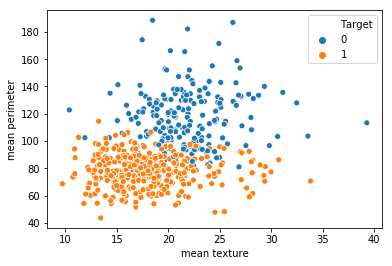

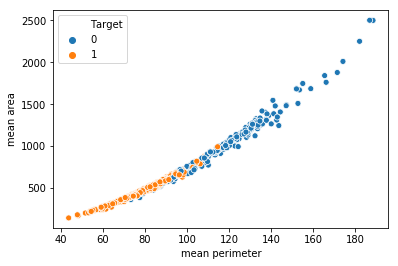

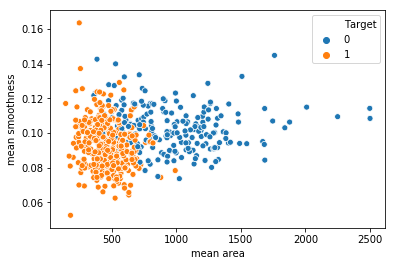

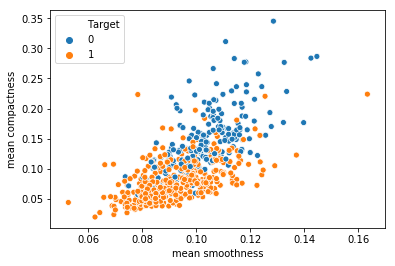

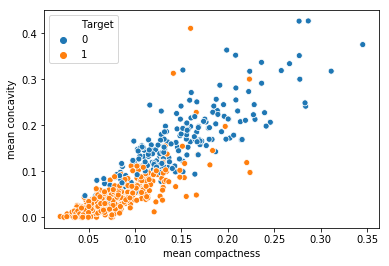

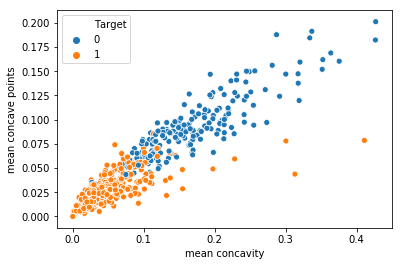

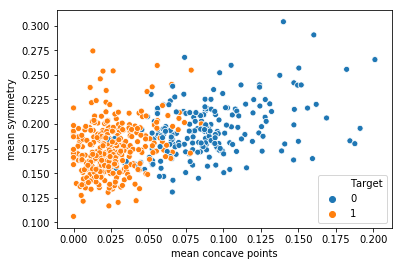

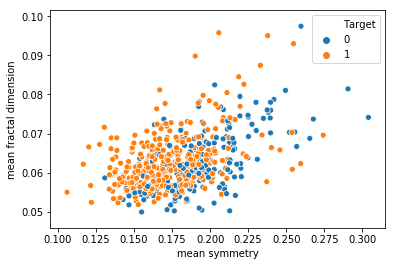

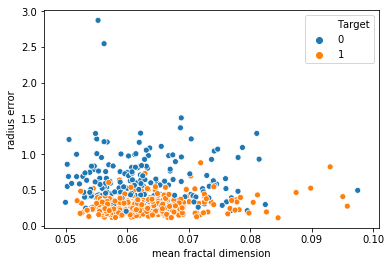

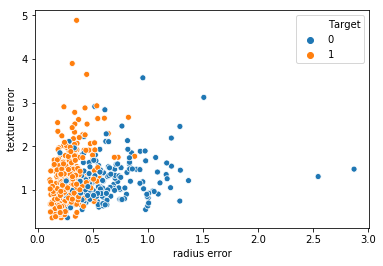

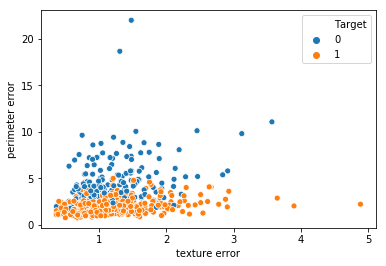

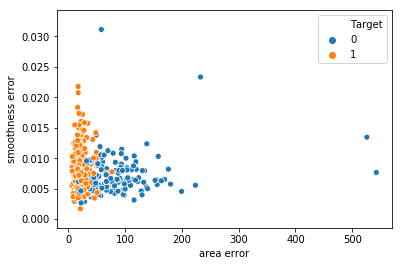

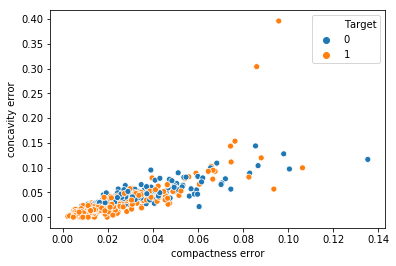

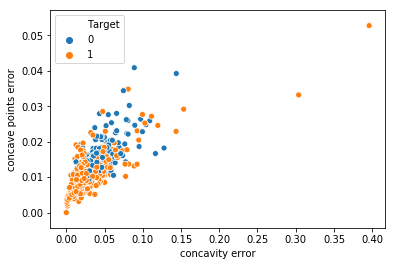

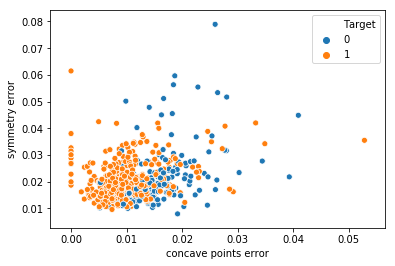

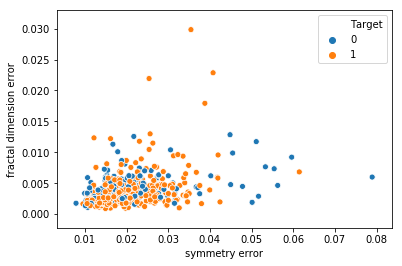

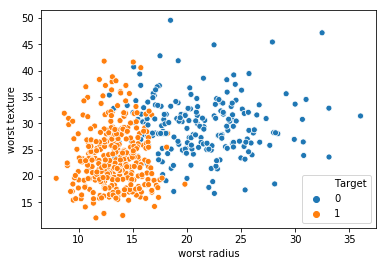

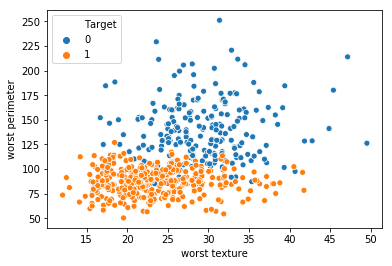

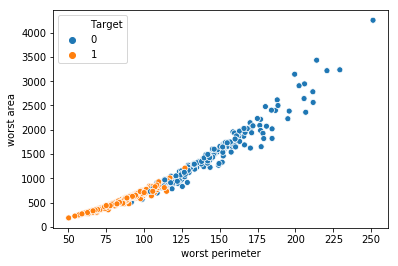

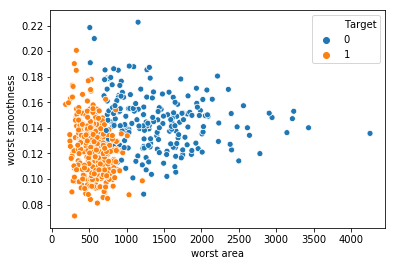

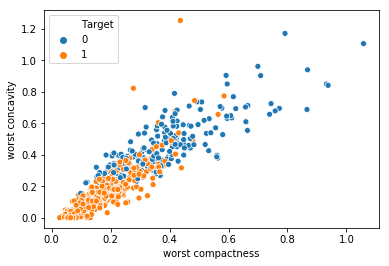

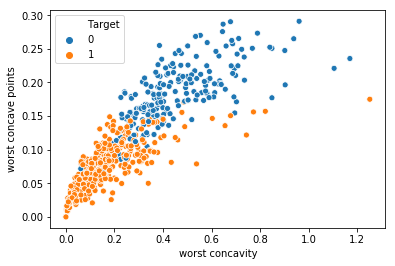

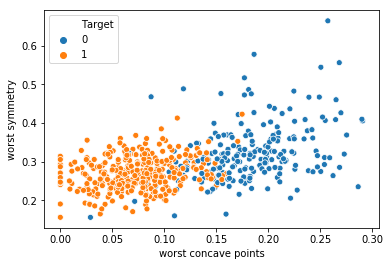

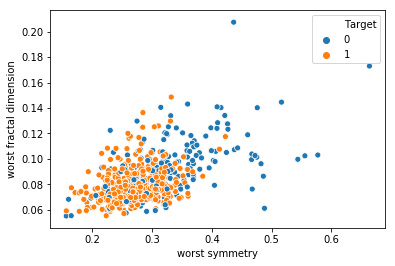

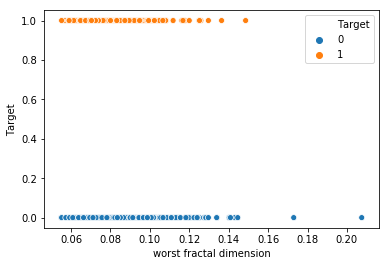

In [10]:
scatterplotting()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X= data.iloc[:,0:-1]
y = data['Target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report

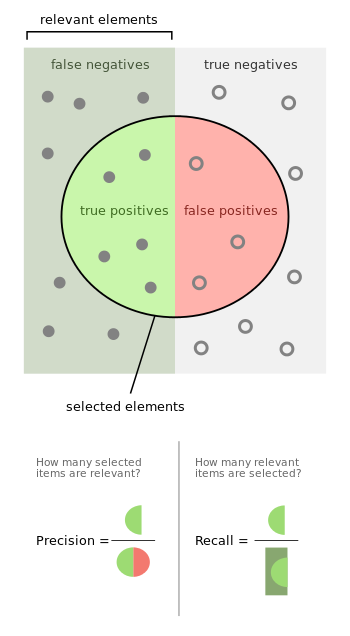

In [35]:
def modeling(X_train, X_test, y_train, y_test):
    for clf, model in zip([SVC(), 
                RandomForestClassifier(), 
                LogisticRegression(), 
                AdaBoostClassifier()],
                          ['SVM','RF','LOG','ADA']):

        clf.fit(X_train,y_train)
        pred = clf.predict(X_test)

        print(model,classification_report(y_test,pred))
        print('\n')
        sns.heatmap(confusion_matrix(y_test,pred),annot=True)
        print(confusion_matrix(y_test,pred))
        plt.show()
    

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
minmax = MinMaxScaler()

In [38]:
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [39]:
modeling(X_train_scaled, X_test_scaled, y_train, y_test)

SVM               precision    recall  f1-score   support

           0       0.97      0.88      0.92        67
           1       0.94      0.98      0.96       121

   micro avg       0.95      0.95      0.95       188
   macro avg       0.95      0.93      0.94       188
weighted avg       0.95      0.95      0.95       188



[[ 59   8]
 [  2 119]]


/Users/Matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/Users/Matt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF               precision    recall  f1-score   support

           0       0.91      0.94      0.93        67
           1       0.97      0.95      0.96       121

   micro avg       0.95      0.95      0.95       188
   macro avg       0.94      0.95      0.94       188
weighted avg       0.95      0.95      0.95       188



[[ 63   4]
 [  6 115]]


LOG               precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.95      0.98      0.96       121

   micro avg       0.95      0.95      0.95       188
   macro avg       0.95      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



[[ 61   6]
 [  3 118]]


/Users/Matt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ADA               precision    recall  f1-score   support

           0       0.91      0.96      0.93        67
           1       0.97      0.95      0.96       121

   micro avg       0.95      0.95      0.95       188
   macro avg       0.94      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



[[ 64   3]
 [  6 115]]


# Parameter Tuning

In [43]:
param_grid = {'C':[1,0.1,0.001], 'kernel':['rbf','linear','poly']}

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
grid = GridSearchCV(SVC(),param_grid=param_grid,verbose=4)

In [46]:
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, kernel=rbf .................................................
[CV] ................. C=1, kernel=rbf, score=0.9453125, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ......... C=1, kernel=rbf, score=0.937007874015748, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.9365079365079365, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ................ C=1, kernel=linear, score=0.96875, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ...... C=1, kernel=linear, score=0.952755905511811, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9682539682539683, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ............

/Users/Matt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/Matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' o

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 0.1, 0.001], 'kernel': ['rbf', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [49]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [50]:
new_pred = grid.predict(X_test_scaled)

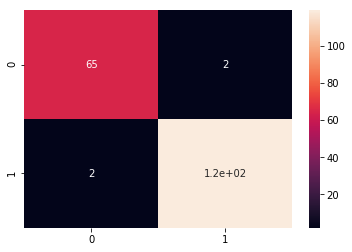

In [51]:
sns.heatmap(confusion_matrix(y_test,new_pred),annot=True)